In [1]:
################################
# Solves -u'' = f              #
# With zero Dirichlet boundary #
################################
import radiant as rad
import numpy as np
import matplotlib.pyplot as plt


# Problem Parameters
a = 0.
b = 1.


def exact(*x):
    return np.prod(np.sin(np.asarray(x) * 2 * np.pi / (b - a)), axis=0)


def f(*x):
    return (len(x) * (2 * np.pi / (b - a)) ** 2) * exact(*x)


def g(*x):
    return np.zeros_like(x[0])

In [2]:
# Parameters
d = 2
k = 2
delta = 1.0
N = 10

# Computed Parameters
ranges = ((a, b),) * d
xc = rad.gridn(ranges, N, flat=True)
idx_funcs = [
    lambda cs: np.all([np.logical_and(c != a, c != b) for c in cs], axis=0),
    lambda cs: np.any([np.logical_or(c == a, c == b) for c in cs], axis=0),
]
operators = [
    lambda func: lambda *x: - func.laplacian(*x),
    lambda func: lambda *x: func(*x),
]

# # Integration
# error_integrator = rad.integrate.QuadIntegrator(ranges)
# 
# # Solve for approximate solution
# phi = rad.Wendland(d, k, delta, xc)
# solver = rad.solve.CollocationSolver(phi, operators, idx_funcs)
# approx = solver.solve(f, g)
# error = rad.error(exact, approx, error_integrator)
# 
# print("L2 Relative Error:", error)
# print("Condition Number:", solver.cond())

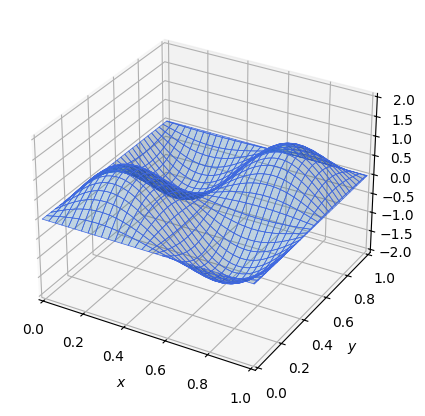

In [3]:
x, y = rad.gridn(ranges, 250)
exact_val = exact(x, y)


fig = plt.figure(figsize=(5, 5))
ax = plt.subplot(projection='3d')
ax.plot_surface(x, y, exact_val, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8, alpha=0.25)
ax.set_zlim((-2., 2.))
ax.margins(x=0., y=0.)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.savefig("figures/c3-poisson-dirichlet-exact.pdf")

/home/keane/Projects/radiant/venv/lib/python3.10/site-packages/cupyx/scipy/sparse/linalg/_iterative.py:192: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  ret = numpy.linalg.lstsq(cupy.asnumpy(H), e)


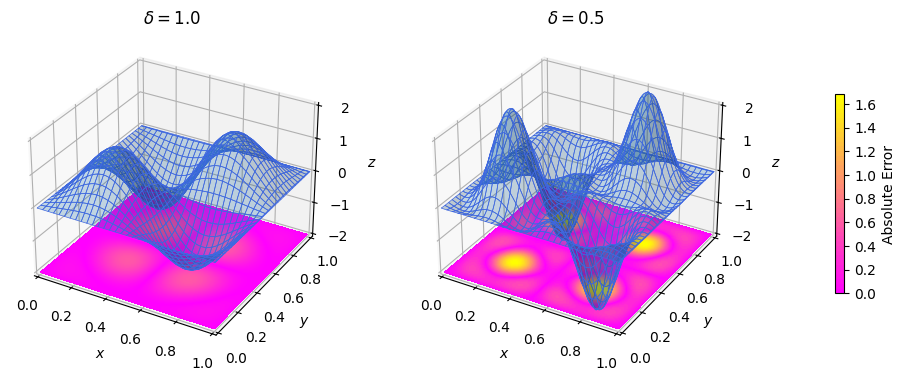

In [4]:
deltas = [1., 0.5]

fig, axs = plt.subplots(1, 2, figsize=(10, 4.5), subplot_kw={'projection': '3d'})

approx_vals = np.array([rad.solve.CollocationSolver(rad.Wendland(d, k, delta, xc), operators, idx_funcs).solve(f, g)(x, y) for delta in deltas])
errors = np.array([np.abs(approx_val - exact_val) for approx_val in approx_vals])
max_error = np.max(errors)

im = None
for i, (ax, delta, approx_val, error) in enumerate(zip(axs.flat, deltas, approx_vals, errors)):
    surf = ax.plot_surface(x, y, approx_val, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8, alpha=0.25)
    im = ax.contourf(x, y, error, 50, vmin=0., vmax=max_error, offset=-2., zdir='z', cmap='spring')
    ax.set_zlim((-2., 2.))
    ax.margins(x=-0.1, y=-0.1)
    ax.set_title(f"$\\delta = {delta}$")
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')

plt.tight_layout()
plt.subplots_adjust(hspace=0.25, wspace=0.25)
cbar = plt.colorbar(im, ax=axs.ravel().tolist(), shrink=0.5, pad=0.1)
cbar.set_label("Absolute Error")
plt.savefig("figures/c3-kansa-poisson.pdf", bbox_inches='tight', pad_inches=0.5)